In [ ]:
!git clone --recursive https://github.com/orkuntemiz/knncuda.git

In [ ]:
%cd knncuda

In [ ]:
!pip install pybind11
import pybind11

In [ ]:
!./compile.sh

In [24]:
import numpy as np 

def KNN(ref_data, query_data, K):
    '''
    input:
        ref_data: array, N x dim
        query_data: array, M x dim
        K: Scalar
    output:
        dist: M x K
        inds: M x K
    '''

    res = knncuda.knn(np.ascontiguousarray(ref_data.T), np.ascontiguousarray(query_data.T), K)

    return res.knn_dist, res.knn_index

In [ ]:
import numpy as np 
import knn_util
import time
from knn_util import knncuda

ref_num = 16384
query_num = 4096
dim = 3
k = 16

ref_data = np.random.rand(ref_num, dim)
ref_data_label=np.random.randint(1,5,ref_num)
query_data = np.random.rand(query_num, dim)

num_iter = 100

start_t = time.time()
for i in range(num_iter):

    # note the input array should be contiguous and dim x num, and the output is num x k
    dist, inds = KNN(ref_data, query_data, k)
total_time = time.time() - start_t

print("ref_num : ", ref_num)
print("query_num : ", query_num)
print("dim : ", dim)
print("num of neighbours : ", k)
print("mean time over {} iter : ".format(num_iter), total_time / num_iter)

ref_num :  16384
query_num :  4096
dim :  3
num of neighbours :  16
mean time over 100 iter :  0.03114288330078125


In [ ]:
import statistics 
from statistics import mode 
# Program to find most frequent  
# element in a list 
  
from collections import Counter 
  
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

In [ ]:
query_data_label=[]
for idx in inds:
  labels=[]
  for item in idx:
    labels.append(ref_data_label[item])
  query_data_label.append(str(most_frequent(labels))) 

In [ ]:
!pip install sparse
!pip install scipy

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa37f539a90>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

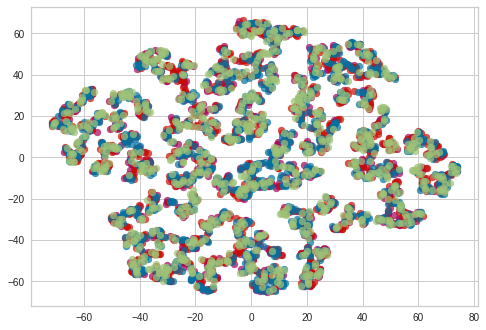

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sparse
import scipy
from scipy.sparse import csr_matrix
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
#corpus = load_hobbies()
#tfidf = TfidfVectorizer()
#X = tfidf.fit_transform(corpus.data)
#y = corpus.target

X = scipy.sparse.csr_matrix(np.concatenate((ref_data[:1], query_data)))
y = np.concatenate((ref_data_label[:1], query_data_label)).tolist()

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(decompose_by=2)
tsne.fit(X, y)


In [ ]:
import numpy as np 
import knn_util
import time
from knn_util import knncuda

ref_num = 30000
query_num = 30000
dim = 32
k = 16

ref_data = np.random.rand(ref_num, dim)
ref_data_label=np.random.randint(1,5,ref_num)
query_data = np.random.rand(query_num, dim)

num_iter = 100

start_t = time.time()
for i in range(num_iter):

    # note the input array should be contiguous and dim x num, and the output is num x k
    dist, inds = KNN(ref_data, query_data, k)
total_time = time.time() - start_t

print("ref_num : ", ref_num)
print("query_num : ", query_num)
print("dim : ", dim)
print("num of neighbours : ", k)
print("mean time over {} iter : ".format(num_iter), total_time / num_iter *1000)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=16)
start_t = time.time()
for i in range(2):

    knn_model.fit(ref_data, ref_data_label)
    distsklearn, indsklearn = knn_model.kneighbors(query_data)

total_time = time.time() - start_t
print("mean time over {} iter : ".format(num_iter), total_time / 2*1000)